In [1]:
# Emsemble 앙상블

In [2]:
# random forest: 병렬적
# boost 계열: 직렬적, 순차적 (점점 오류를 줄여나가는 느낌)

In [67]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.datasets import load_breast_cancer # 유방암 데이터

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [68]:
cancer = load_breast_cancer()
cancer.keys() # key 데이터가 어떤 것인지 알려줌

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [69]:
cancer.target_names #0: malignant악성 종양, 1: benign 일반 종양

array(['malignant', 'benign'], dtype='<U9')

In [70]:
cancer.feature_names.shape, cancer.feature_names

((30,),
 array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
        'mean smoothness', 'mean compactness', 'mean concavity',
        'mean concave points', 'mean symmetry', 'mean fractal dimension',
        'radius error', 'texture error', 'perimeter error', 'area error',
        'smoothness error', 'compactness error', 'concavity error',
        'concave points error', 'symmetry error',
        'fractal dimension error', 'worst radius', 'worst texture',
        'worst perimeter', 'worst area', 'worst smoothness',
        'worst compactness', 'worst concavity', 'worst concave points',
        'worst symmetry', 'worst fractal dimension'], dtype='<U23'))

In [71]:
data_df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
data_df[:2]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [72]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, test_size=0.2, random_state=156)

In [73]:
lr_model = LogisticRegression(solver="liblinear", max_iter = 5000) # solver="liblinear", 
knn_model = KNeighborsClassifier(n_neighbors=8)
vot_model = VotingClassifier(estimators=[("LR", lr_model ), ("knn", knn_model)], voting="soft")
# 이 둘을 서로 투표하게 해서 일하기를 원함

lr_model.fit(X_train, y_train) #X_train, y_train 줄 테니 학습해라 
y_pred = lr_model.predict(X_test) #X_test 주면 답을 알려달라
print("lr_model: ", accuracy_score(y_test, y_pred))
      
knn_model.fit(X_train, y_train)  
y_pred = knn_model.predict(X_test) #X_test 주면 답을 알려달라
print("knn_model: ", accuracy_score(y_test, y_pred))
      
vot_model.fit(X_train, y_train)  
y_pred = vot_model.predict(X_test) #X_test 주면 답을 알려달라
print("vot_model: ", accuracy_score(y_test, y_pred))
# voting이 더 유리한 경우

lr_model:  0.9473684210526315
knn_model:  0.9385964912280702
vot_model:  0.956140350877193


In [74]:
lr_model = LogisticRegression(max_iter = 5000) # solver="liblinear" : 적은 데이터에 유리
knn_model = KNeighborsClassifier(n_neighbors=8)
vot_model = VotingClassifier(estimators=[("LR", lr_model ), ("knn", knn_model)], voting="soft")
# 이 둘을 서로 투표하게 해서 일하기를 원함

lr_model.fit(X_train, y_train) #X_train, y_train 줄 테니 학습해라 
y_pred = lr_model.predict(X_test) #X_test 주면 답을 알려달라
print("lr_model: ", accuracy_score(y_test, y_pred))
      
knn_model.fit(X_train, y_train)  
y_pred = knn_model.predict(X_test) #X_test 주면 답을 알려달라
print("knn_model: ", accuracy_score(y_test, y_pred))
      
vot_model.fit(X_train, y_train)  
y_pred = vot_model.predict(X_test) #X_test 주면 답을 알려달라
print("vot_model: ", accuracy_score(y_test, y_pred))
# voting이 더 불리한 경우 - lr_model에 solver="liblinear", 더하면 유리해짐

lr_model:  0.9649122807017544
knn_model:  0.9385964912280702
vot_model:  0.9473684210526315


In [75]:
# voting="hard" or "soft" 
# hard 분류기1의 결과가 1 0 1 1
#      분류기2의 결과가 1 0 0 1  -- 다름
#      분류기3의 결과가 1 0 1 1 
# voting 결과           1 0 1 1  (결과를 일반 다수결에 따름)

# soft 분류기1의 결과가 0.9 0.1 0.4 0.8    1 0 0 1
#      분류기2의 결과가 0.1 0.1 0.4 0.2    0 0 0 0
#      위의 결과가      0.5 0.1 0.4 0.5    1 0 0 1 (확률을 종합)


In [76]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators = 100, random_state=0) # n_estimator: 기본 값 100
rf_model.fit(X_train, y_train) # 훈련해 봐라
rf_model.predict(X_test) 
y_pred = rf_model.predict(X_test)
print("rf_model: ", accuracy_score(y_test, y_pred))

rf_model:  0.956140350877193


<BarContainer object of 30 artists>

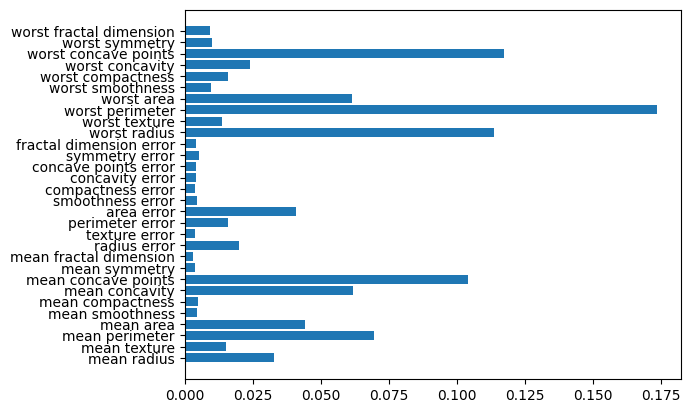

In [77]:
plt.barh(cancer.feature_names, rf_model.feature_importances_) # 중요하게 봤던 부분 높게 나옴

In [78]:
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier(random_state=0)
gb_model.fit(X_train, y_train)
y_pred = gb_model.predict(X_test)
print("gb_model: ", accuracy_score(y_test, y_pred))

gb_model:  0.956140350877193


In [79]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((455, 30), (455,), (114, 30), (114,))

In [108]:
X_train, X_val, y_train, y_val =train_test_split(X_train, y_train, test_size=0.1, random_state = 156)
#X_train , y_train을 쪼개겠다. test_size인 10%로 쪼개겠다.
X_train.shape, X_val.shape, y_train.shape, y_val.shape,X_test.shape, y_test.shape

((297, 30), (34, 30), (297,), (34,), (114, 30), (114,))

In [109]:
368/(368+41+114), 41/(368+41+114), 114/(368+41+114) # 맞을 확률? / 진짜 맞은 확률? / 진짜 틀린확률?

(0.7036328871892925, 0.07839388145315487, 0.2179732313575526)

In [110]:
#!pip install xgboost
import xgboost

In [111]:
dtrain = xgboost.DMatrix(data=X_train , label=y_train ) # 훈련용 - 데이터 트레인
dval = xgboost.DMatrix(data=X_val , label=y_val ) #  밸리데이션
dtest = xgboost.DMatrix(data=X_test , label=y_test ) # test용 

In [112]:
params = {'max_depth':3, 'eta': 0.05, 'objective':'binary:logistic','eval_metric':'logloss' }
num_rounds = 400

In [113]:
eval_list = [(dtrain, 'train'), (dval,'eval')] # train과 eval은 꼭 적어줘야 알아들음

In [114]:
xgb_model = xgboost.train(params=params, dtrain=dtrain, num_boost_round=num_rounds,
                          early_stopping_rounds=50,
                          evals=eval_list)

[0]	train-logloss:0.65033	eval-logloss:0.65118
[1]	train-logloss:0.61162	eval-logloss:0.61229
[2]	train-logloss:0.57627	eval-logloss:0.57599
[3]	train-logloss:0.54401	eval-logloss:0.54720
[4]	train-logloss:0.51424	eval-logloss:0.51670
[5]	train-logloss:0.48685	eval-logloss:0.49273
[6]	train-logloss:0.46090	eval-logloss:0.47066
[7]	train-logloss:0.43720	eval-logloss:0.44784
[8]	train-logloss:0.41489	eval-logloss:0.42777
[9]	train-logloss:0.39455	eval-logloss:0.40998
[10]	train-logloss:0.37520	eval-logloss:0.39487
[11]	train-logloss:0.35729	eval-logloss:0.37858
[12]	train-logloss:0.34040	eval-logloss:0.36587
[13]	train-logloss:0.32435	eval-logloss:0.35056
[14]	train-logloss:0.30973	eval-logloss:0.33979
[15]	train-logloss:0.29559	eval-logloss:0.32644
[16]	train-logloss:0.28233	eval-logloss:0.31401
[17]	train-logloss:0.27022	eval-logloss:0.30564
[18]	train-logloss:0.25858	eval-logloss:0.29804
[19]	train-logloss:0.24744	eval-logloss:0.28910
[20]	train-logloss:0.23698	eval-logloss:0.28085
[2

In [122]:
y_pred_proba = xgb_model.predict(dtest) # 그레디언트는 기본적으로 확률로 나오기에 바꿔줘야 함
print(y_pred_proba[:5])
y_pred = [1 if x>=0.5 else 0 for x in y_pred_proba[:5]]
print(y_pred)

[0.9529979  0.0121447  0.2651208  0.20910451 0.97532815]
[1, 0, 0, 0, 1]


In [123]:
y_pred = [1 if x>=0.5 else 0 for x in y_pred_proba]
accuracy_score(y_test, y_pred)

0.9298245614035088

In [124]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred_proba) # 면적을 얘기함 (1에 가까울 수록 좋음 true Positive가 많다.)

0.9838539838539838

In [ ]:
#!pip uninstall scikit-learn

In [ ]:
# 분류: y(이산적, 카테코리컬) ~~~ Classifier
# 회귀: y(연속적)

In [2]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_boston # 보스턴 시티에 있는 집값을 조사
boston = load_boston() # sklearn 1.2이하? 미만? 이였었을거임
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [3]:
import sklearn
sklearn.__version__

'0.24.2'

In [5]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [6]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21